<a href="https://colab.research.google.com/github/sopranomax/DataScienceClasses/blob/main/Data201_Project1_Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 201 Project 1 Obesity Data
### Marilyn Macy, Preethi Athota and Kris Sutton
### November 4, 2021

## Dataset - Estimation of obesity levels based on eating habits and physical condition
### Source: UCI Machine Learning Repository
#### https://archive-beta.ics.uci.edu/ml/datasets/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Additional Source: Kaggle
https://www.kaggle.com/pmrich/obesitydataset-eda-data-prep-ml-hypertuning


### Dataset information

The dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The dataset was contributed to the UCI Machine Learning Repository on 2019-08-27.

**Number of observations:** 2111

**Number of variables:** 17

**Data Dictionary:**  

Category	| Feature Name | Description | Variable Type
--------- | ------------ | ------------ | -------------- 
Target Variable | NObesity | Based on BMI | Categorical
Eating Habits |	FAVC | Frequent consumption of high caloric food | Categorical 
Eating Habits |	FCVC | Frequency of consumption of vegetables	| Ordinal 
Eating Habits	| NCP | Number of main meals | Ordinal
Eating Habits	| CAEC | Consumption of food between meals | Ordinal
Eating Habits	| CH20 | Consumption of water daily | Ordinal
Eating Habits	| CALC | Consumption of alcohol | Ordinal
Physical Conditioning | SCC | Calories consumption monitoring | Categorical
Physical Conditioning | FAF	| Pysical activity frequency | Ordinal
Physical Conditioning | TUE	| Time using technology devices | Ordinal
Physical Conditioning | MTRANS | Transportation used | Categorical
Physical Conditioning | SMOKE |	Smokes Yes or No | Categorical
Responder Characteristics | Family History with Overweight | Yes or No | Categorical
Responder Charateristics | Gender | Male or Female | Categorical
Responder Charateristics | Age | Age in years | Integer
Responder Charateristics | Height | Height in meters | Float
Responder Charateristics | Weight | Weight in kilograms | Float

## Project 1 Questions

1. Is BMI distribution approximately normal? For males? For females?
2. Is there a relationship between transportation method and obesity?
3. Is there a relationship between family history with overweight and obesity? 



In [10]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib as mpl 
#import pyplot
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
#import dataset

plt.style.use('classic')

from pandas_profiling import ProfileReport
from IPython.display import Image

In [11]:
# read obesity dataset
obesity = pd.read_csv('/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv')
ob_clean = pd.read_csv('/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv')
#obesity = pd.read_csv('https://github.com/sopranomax/DataScienceClasses/blob/main/ObesityDataSet_raw_and_data_sinthetic.csv')
obesity.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Check the dataset for nulls:

In [12]:
#Checking for N/A
obesity.isnull()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#Counting "n/a"s in dataset
obesity.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**Look at the distributions for Height and Weight**

Boxplots show one outlier for Height and one outlier for Weight:

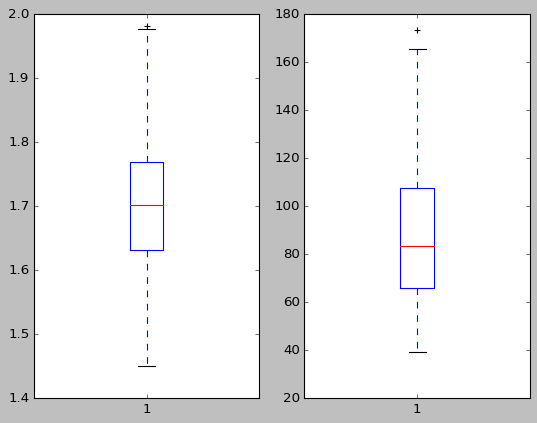

In [27]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.boxplot(obesity['Height'])

# create the second panel and set current axis
plt.subplot(1, 2, 2)
plt.boxplot(obesity['Weight']);




Histograms for Height and Weight

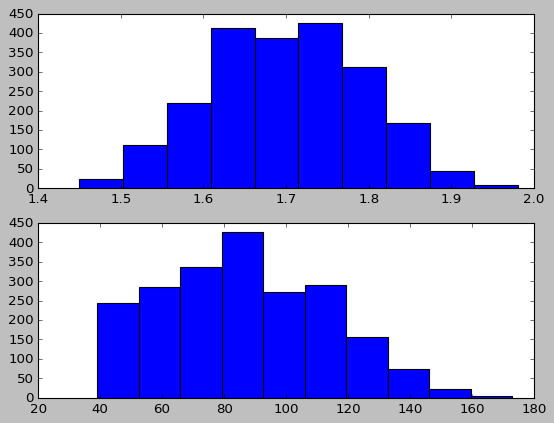

In [30]:
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.hist(obesity['Height'])

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.hist(obesity['Weight']);


Calculate Body Mass Index (BMI) = $weight (kg)$ / $(height (m))^2$

In [ ]:
# create the first of two panels and set current axis
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.boxplot(obesity['Height'])

# create the second panel and set current axis
plt.subplot(1, 2, 2)
plt.boxplot(obesity['Weight']);

In [5]:
# create BMI column
obesity['BMI'] = obesity['Weight'] / obesity['Height'] ** 2
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


What does the distribution of BMI look like? The distribution of BMI is bimodal, the mean and median are close together. The mean is slighty higher than the median indicating some skew to the right.  

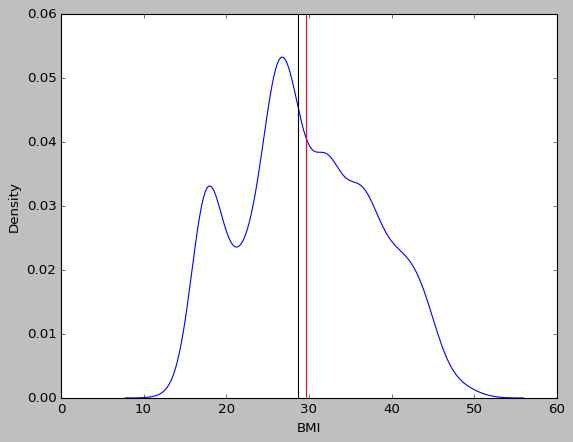

In [6]:
import seaborn as sns
sns.kdeplot(obesity['BMI'])
plt.axvline(np.mean(obesity['BMI']), color='red')
plt.axvline(np.median(obesity['BMI']), color='black')

WHO Weight categories: https://github.com/sopranomax/DataScienceClasses/blob/main/WHO_Obesity_Categories.jpg

source: https://apps.who.int/iris/bitstream/handle/10665/43190/9241593024_eng.pdf

What are the obesity categories in the dataset?

What are the ranges for the obesity categories in the dataset?



In [ ]:
# look at the obesity categories in the dataset
o_cats = set(obesity['NObeyesdad'])
o_cats
o_ranges = np.array(o_cats, )

{'Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II'}

## Bootstrap inference of Median

We will perform a nonparametric inference of the median for the BMI variable.  The median of BMI is 

We'll perform a bootstrap sampling using a sample of 10% of the data size:

In [ ]:
print('Data size = ',len(obesity))
n = round(len(obesity) * 0.10)
print('Sample size = ', n)


Data size =  2111
Sample size =  211


Numpy bootstrap median for BMI =  28.87148799347237
95% CI for BMI median =  [27.58102221 31.04769454]


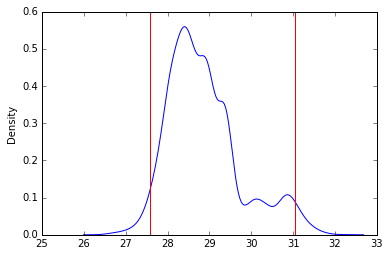

In [ ]:
# initialize the sample list
bmi_median_samples = []

# perform bootstrap with numpy
for i in range(5000):
        boot_sample = np.random.choice(obesity['BMI'], n)
        bmi_median_samples.append(np.median(boot_sample))
        
print("Numpy bootstrap median for BMI = ", np.mean(bmi_median_samples))

conf_int = np.percentile(bmi_median_samples, [2.5, 97.5])
print("95% CI for BMI median = ", conf_int)

sns.kdeplot(bmi_median_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')

resample bootstrap median for BMI =  28.7305785846369
95% CI for BMI median =  [28.31354439 29.2557003 ]


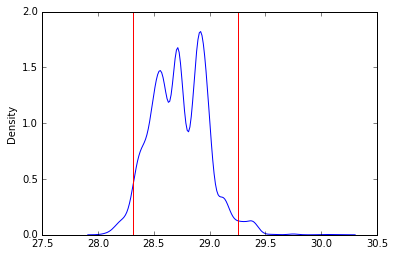

In [ ]:
from sklearn.utils import resample

# perform bootstrap using sklean resample

bmi_median_samples = []
for i in range(5000):
                boot_sample = resample(obesity['BMI'])           # does bootstrap; replace = True
                bmi_median_samples.append(np.median(boot_sample))
        
print("resample bootstrap median for BMI = ", np.mean(bmi_median_samples))

conf_int = np.percentile(bmi_median_samples, [2.5, 97.5])
print("95% CI for BMI median = ", conf_int)

sns.kdeplot(bmi_median_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')